<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH15EJ3 *Random Forest*

En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con la técnica de *Random Forest*. Trabajaremos con el paquete R neuralnet y con el juego de datos [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).

## 1. Instalar los packages necesarios

Para empezar, cargamos todos los paquetes que van a ser utilizados a lo largo del ejercicio.

In [1]:
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(randomForest)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
set.seed(17)

Loading required package: rpart

Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




## 2. Carga de los datos

Leemos el fichero de datos y vemos que consiste en 32 variables, y en la documentación vemos que estas corresponden a:

- 1: Identificador de la muestra
- 2: Diagnóstico (M = maligno, B = benigno)
- 3-32: DIferentes medidas del tamaño y forma del núcleo de las células

In [2]:
wdbc <- read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"), 
    sep=",",
    header=FALSE
)

dim(wdbc)
dataset <- wdbc[,2:32]

[1] 569  32

## 3. Creación del modelo

### Parámetros de creación del modelo

Definimos un cross validation con 3 repeticiones y 10 folds.

In [3]:
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)

## 4. Creamos un primer modelo de árbol

La métrica que usaremos para la evaluación del modelo será `Accuracy`.

In [4]:
model.cart<-train(V2~., data=dataset, method="rpart", metric="Accuracy", trControl=control)

### Matriz de confusión

In [5]:
confusionMatrix(model.cart)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    B    M
         B 59.1  3.9
         M  3.6 33.4
                           
 Accuracy (average) : 0.925


###  Mostramos las características del modelo

In [6]:
print(model.cart)

CART 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 513, 512, 513, 511, 512, 512, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.004716981  0.9250663  0.8394097
  0.049528302  0.9098799  0.8071873
  0.792452830  0.7572772  0.3819199

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.004716981.


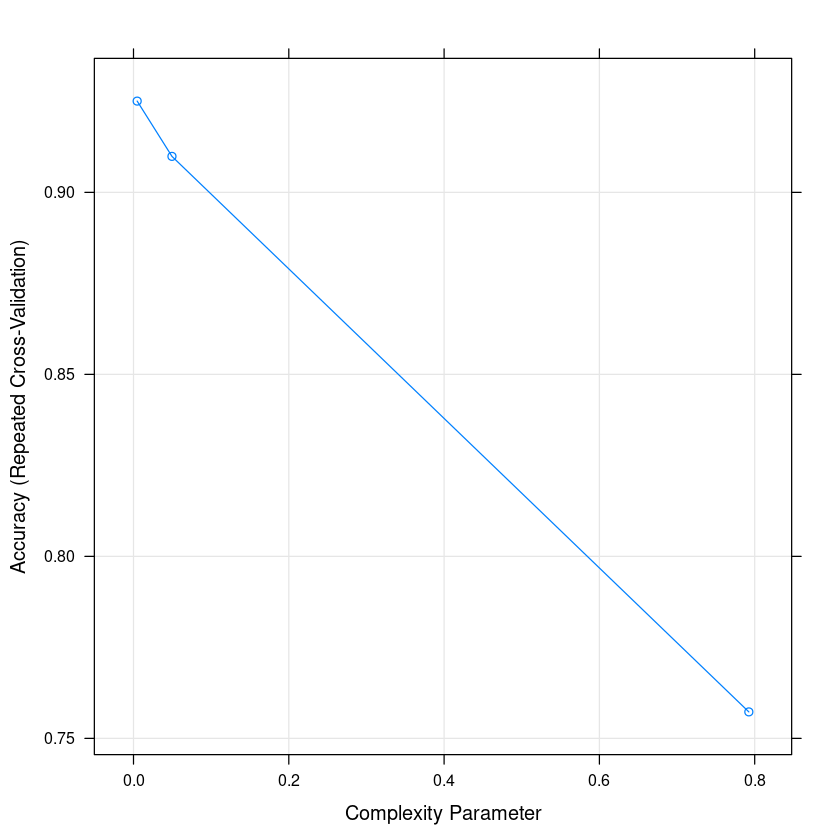

In [7]:
plot(model.cart)

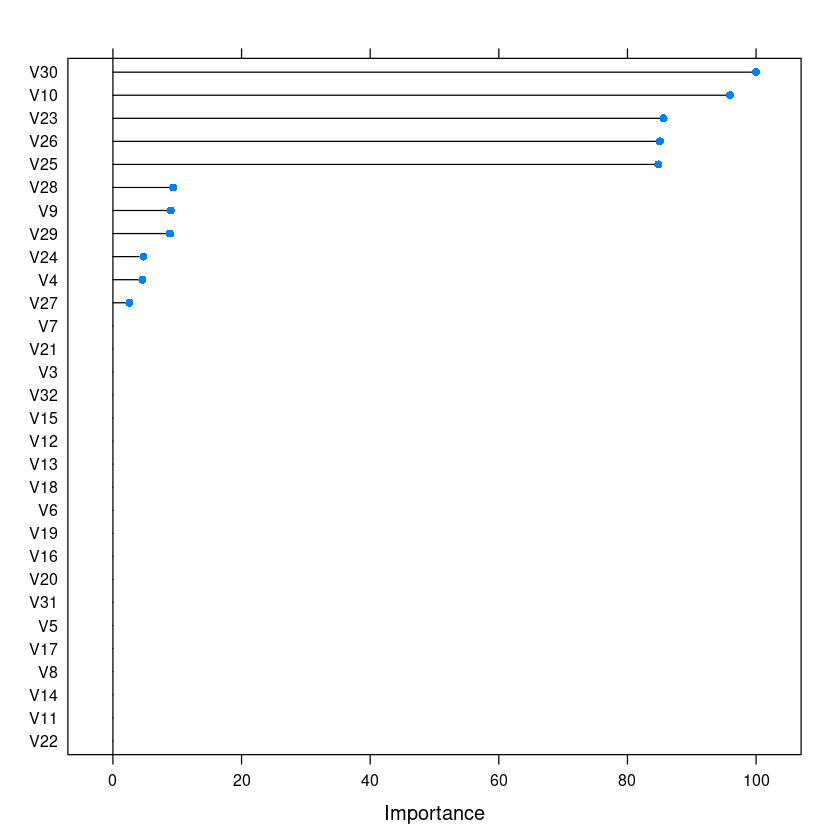

In [8]:
ctreeVarImp = varImp(model.cart)
plot(ctreeVarImp)

## 5. Creación de un árbol con el método Random Forest

In [9]:
 model.rf <- train(V2~., data=dataset, method="rf", metric="Accuracy", trControl=control)

### Matriz de confusión

In [10]:
confusionMatrix(model.rf)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    B    M
         B 61.3  2.1
         M  1.5 35.2
                            
 Accuracy (average) : 0.9649


###  Mostramos todas sus características.

In [11]:
print(model.rf)

Random Forest 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 513, 512, 512, 513, 512, 512, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9613376  0.9168448
  16    0.9648874  0.9247604
  30    0.9613787  0.9172438

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 16.


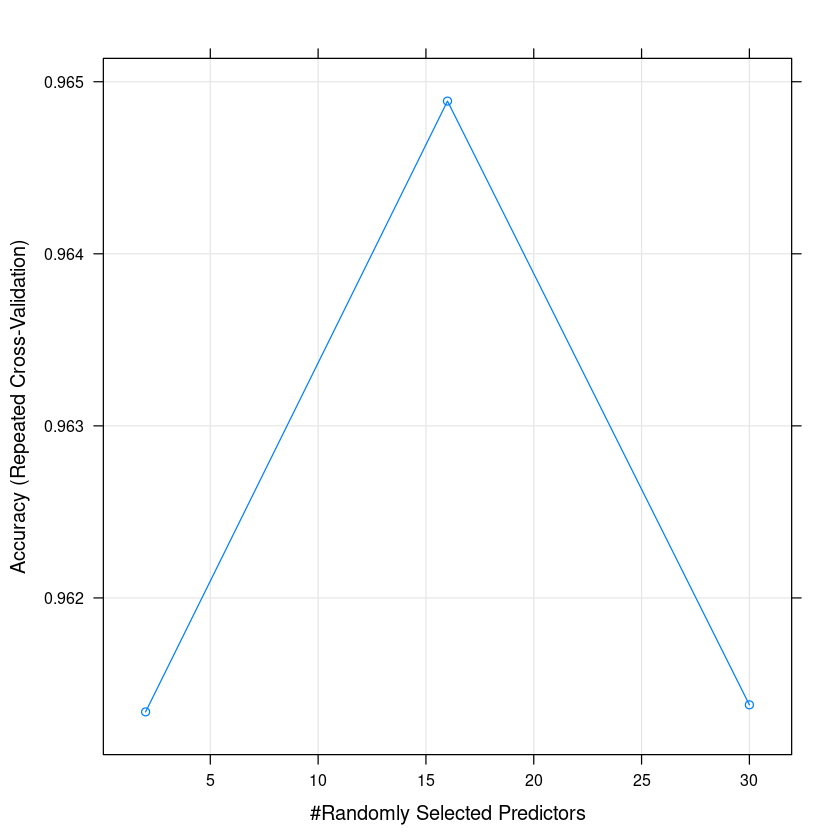

In [12]:
plot(model.rf)

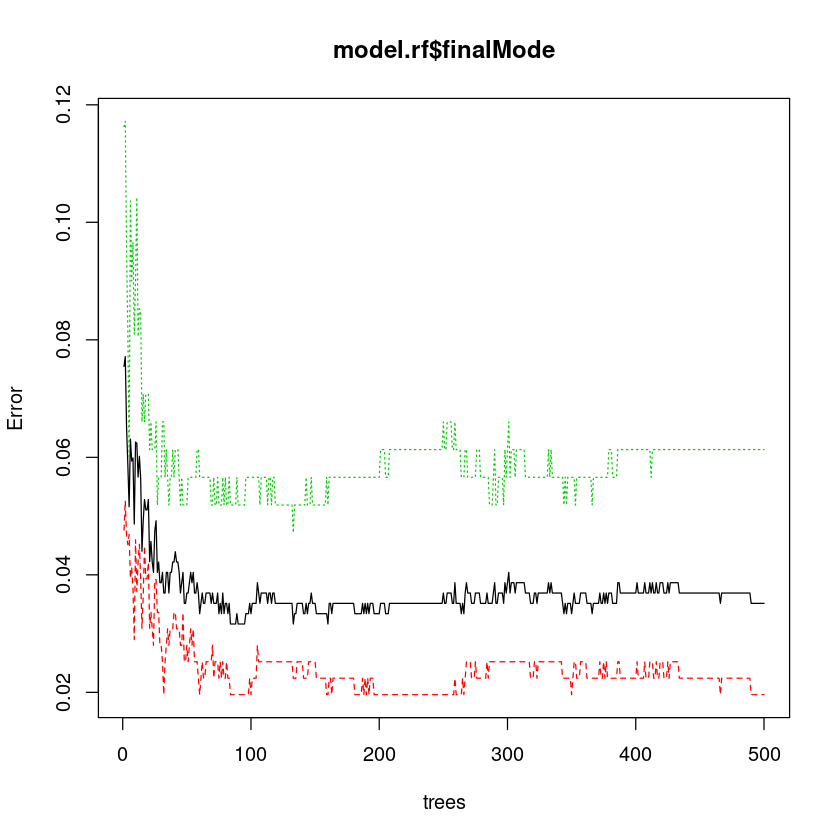

In [13]:
plot(model.rf$finalMode)

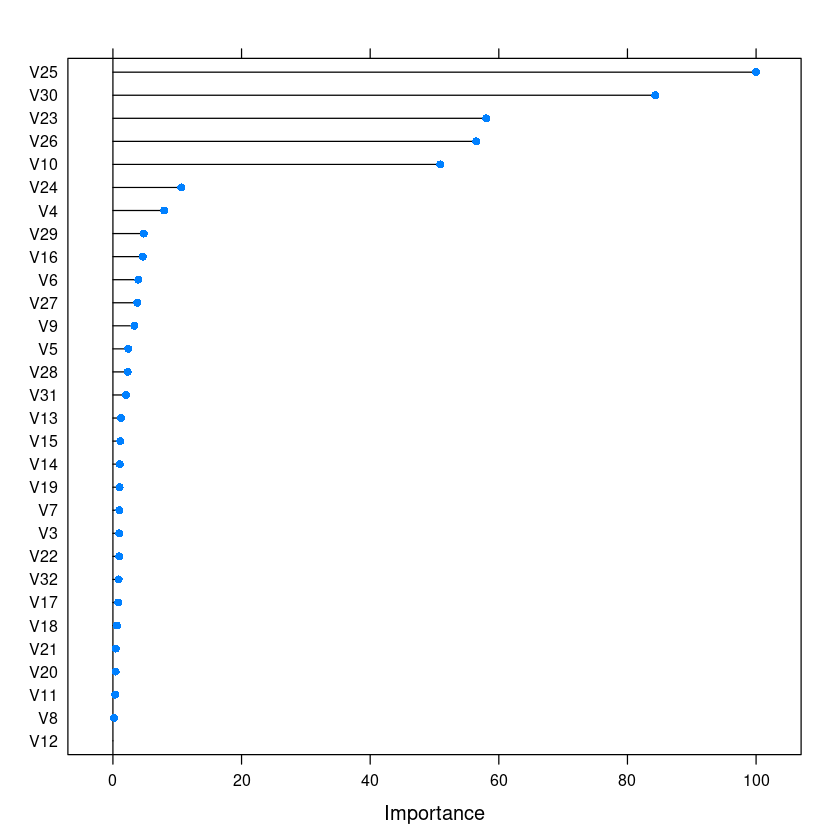

In [14]:
ctreeVarImp = varImp(model.rf)
plot(ctreeVarImp)

## 6. Sumarizamos y comparamos los datos de ambos modelos


Call:
summary.resamples(object = rf_results)

Models: rf, cart 
Number of resamples: 30 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf   0.9122807 0.9473684 0.9649123 0.9648874 0.9824561 1.0000000    0
cart 0.8448276 0.9122807 0.9291980 0.9250663 0.9471335 0.9649123    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf   0.8169557 0.8892100 0.9234432 0.9247604 0.9625700 1.0000000    0
cart 0.6733417 0.8096192 0.8499364 0.8394097 0.8865372 0.9252336    0


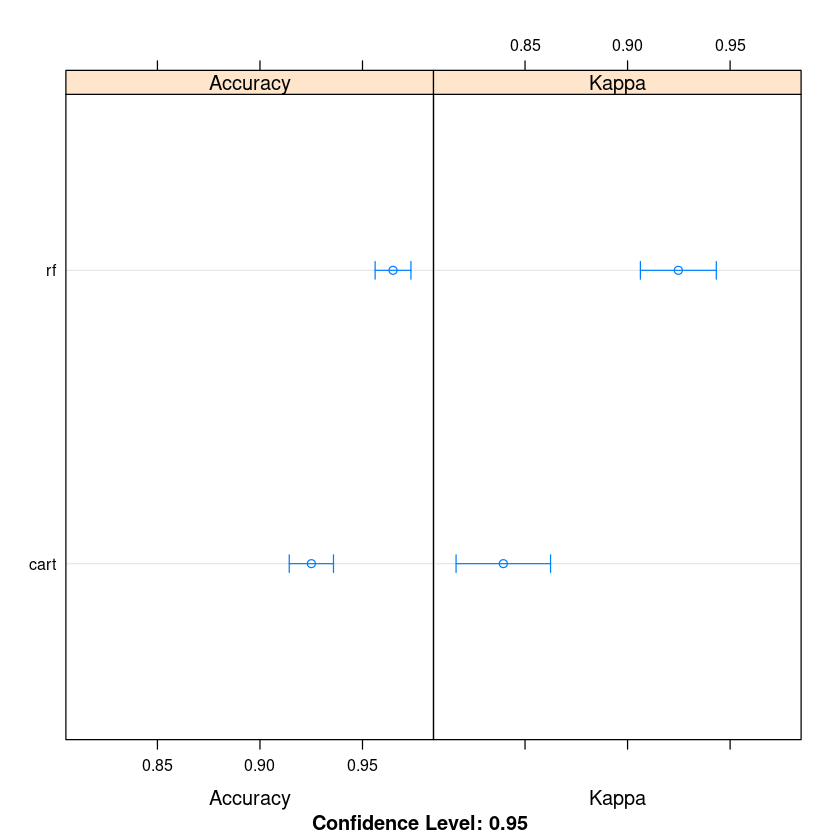

In [15]:
rf_results <- resamples(list(rf=model.rf, cart=model.cart))
summary(rf_results)
dotplot(rf_results)